In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("c:/Data-Science/12-computer_vision/cancer_classification.csv")

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
!pip install seaborn

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.19.5 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 58.0.4 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

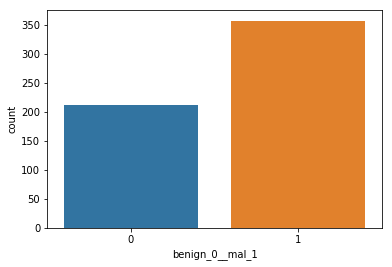

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)


scaler=MinMaxScaler()
scaler.fit(X_train)
MinMaxScaler(copy=True,feature_range=(0,1))
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# for a binary classification problem

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

C:\Users\Yashraj\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yashraj\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yashraj\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yashraj\anaconda3\envs\pytho

In [15]:
X_train.shape

(426, 30)

In [17]:
model =Sequential()

model.add(Dense(units=30,activation="relu"))


model.add(Dense(units=15,activation="relu"))


model.add(Dense(units=1,activation="sigmoid"))


#for a binary classification problem

model.compile(loss="binary_crossentropy",optimizer="adam")



In [18]:
# traininf the model
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1
         )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/step - loss: 5.8755 - val_loss: 6.1317
Epoch 2/600
426/426 [==============================] - 0s 62us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 3/600
426/426 [==============================] - 0s 49us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 4/600
426/426 [==============================] - 0s 57us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 5/600
426/426 [==============================] - 0s 56us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 6/600
426/426 [==============================] - 0s 68us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 7/600
426/426 [==============================] - 0s 63us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 8/600
426/426 [==============================] - 0s 53us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 9/600
426/426 [==============================] - 0s 47us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 10/600
426/426 [===============

426/426 [==============================] - 0s 48us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 81/600
426/426 [==============================] - 0s 45us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 82/600
426/426 [==============================] - 0s 48us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 83/600
426/426 [==============================] - 0s 52us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 84/600
426/426 [==============================] - 0s 56us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 85/600
426/426 [==============================] - 0s 54us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 86/600
426/426 [==============================] - 0s 54us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 87/600
426/426 [==============================] - 0s 67us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 88/600
426/426 [==============================] - 0s 74us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 89/600
426/426 [==============================] - 0s 54us/step - loss: 5.8755 - 

426/426 [==============================] - 0s 124us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 160/600
426/426 [==============================] - 0s 103us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 161/600
426/426 [==============================] - 0s 126us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 162/600
426/426 [==============================] - 0s 117us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 163/600
426/426 [==============================] - 0s 106us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 164/600
426/426 [==============================] - 0s 109us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 165/600
426/426 [==============================] - 0s 96us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 166/600
426/426 [==============================] - 0s 111us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 167/600
426/426 [==============================] - 0s 105us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 168/600
426/426 [==============================] - 0s 99us/step 

426/426 [==============================] - 0s 115us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 238/600
426/426 [==============================] - 0s 93us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 239/600
426/426 [==============================] - 0s 99us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 240/600
426/426 [==============================] - 0s 112us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 241/600
426/426 [==============================] - 0s 99us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 242/600
426/426 [==============================] - 0s 124us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 243/600
426/426 [==============================] - 0s 96us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 244/600
426/426 [==============================] - 0s 87us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 245/600
426/426 [==============================] - 0s 86us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 246/600
426/426 [==============================] - 0s 114us/step - lo

426/426 [==============================] - 0s 95us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 316/600
426/426 [==============================] - 0s 75us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 317/600
426/426 [==============================] - 0s 69us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 318/600
426/426 [==============================] - 0s 90us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 319/600
426/426 [==============================] - 0s 66us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 320/600
426/426 [==============================] - 0s 81us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 321/600
426/426 [==============================] - 0s 64us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 322/600
426/426 [==============================] - 0s 72us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 323/600
426/426 [==============================] - 0s 76us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 324/600
426/426 [==============================] - 0s 65us/step - loss: 

Epoch 394/600
426/426 [==============================] - 0s 71us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 395/600
426/426 [==============================] - 0s 76us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 396/600
426/426 [==============================] - 0s 66us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 397/600
426/426 [==============================] - 0s 54us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 398/600
426/426 [==============================] - 0s 68us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 399/600
426/426 [==============================] - 0s 65us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 400/600
426/426 [==============================] - 0s 57us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 401/600
426/426 [==============================] - 0s 67us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 402/600
426/426 [==============================] - 0s 51us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 403/600
426/426 [==============================] - 0s 74us

Epoch 473/600
426/426 [==============================] - 0s 63us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 474/600
426/426 [==============================] - 0s 61us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 475/600
426/426 [==============================] - 0s 69us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 476/600
426/426 [==============================] - 0s 55us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 477/600
426/426 [==============================] - 0s 58us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 478/600
426/426 [==============================] - 0s 61us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 479/600
426/426 [==============================] - 0s 68us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 480/600
426/426 [==============================] - 0s 62us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 481/600
426/426 [==============================] - 0s 65us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 482/600
426/426 [==============================] - 0s 59us

426/426 [==============================] - 0s 82us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 552/600
426/426 [==============================] - 0s 93us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 553/600
426/426 [==============================] - 0s 107us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 554/600
426/426 [==============================] - 0s 106us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 555/600
426/426 [==============================] - 0s 85us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 556/600
426/426 [==============================] - 0s 102us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 557/600
426/426 [==============================] - 0s 85us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 558/600
426/426 [==============================] - 0s 77us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 559/600
426/426 [==============================] - 0s 61us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 560/600
426/426 [==============================] - 0s 72us/step - los

In [20]:
model.history.history

{'val_loss': [6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
  6.131686667462329,
 

In [21]:
model_loss=pd.DataFrame(model.history.history)

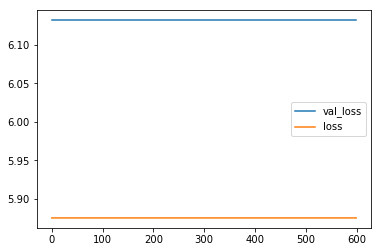

In [22]:
model_loss.plot()

In [26]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

stop training when amonitored quantity has stopped imporving arguments arguments:

In [33]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)


In [34]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1,
         callbacks=[early_stop]
         )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/step - loss: 5.8755 - val_loss: 6.1317
Epoch 2/600
426/426 [==============================] - 0s 65us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 3/600
426/426 [==============================] - 0s 50us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 4/600
426/426 [==============================] - 0s 52us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 5/600
426/426 [==============================] - 0s 44us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 6/600
426/426 [==============================] - 0s 49us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 7/600
426/426 [==============================] - 0s 44us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 8/600
426/426 [==============================] - 0s 47us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 9/600
426/426 [==============================] - 0s 49us/step - loss: 5.8755 - val_loss: 6.1317
Epoch 10/600
426/426 [===============

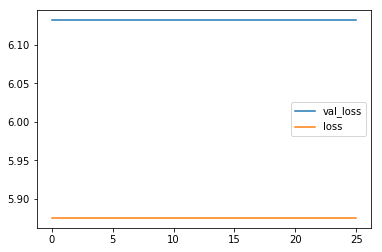

In [36]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
#adding in dropout layers
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [40]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1,
         callbacks=[early_stop]
         )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/step - loss: 7.6678 - val_loss: 6.1317
Epoch 2/600
426/426 [==============================] - 0s 90us/step - loss: 8.0690 - val_loss: 6.1317
Epoch 3/600
426/426 [==============================] - 0s 59us/step - loss: 6.8700 - val_loss: 6.1317
Epoch 4/600
426/426 [==============================] - 0s 53us/step - loss: 7.5439 - val_loss: 6.1317
Epoch 5/600
426/426 [==============================] - 0s 54us/step - loss: 7.7114 - val_loss: 6.1317
Epoch 6/600
426/426 [==============================] - 0s 53us/step - loss: 6.7662 - val_loss: 6.1317
Epoch 7/600
426/426 [==============================] - 0s 56us/step - loss: 7.3993 - val_loss: 6.1317
Epoch 8/600
426/426 [==============================] - 0s 54us/step - loss: 6.9811 - val_loss: 6.1317
Epoch 9/600
426/426 [==============================] - 0s 58us/step - loss: 7.2962 - val_loss: 6.1317
Epoch 10/600
426/426 [===============

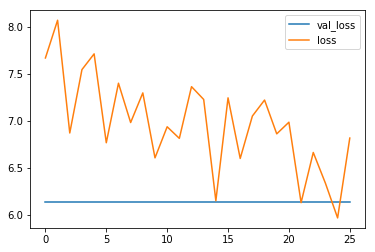

In [41]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
# model evaluation
# get probabilities

# convert probabilities to class labels (0 or 1)
predictions = (y_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


NameError: name 'y_prob' is not defined